In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.markers import MarkerStyle
from warnings import filterwarnings


In [2]:
AllCombos=pd.read_csv("40Missing.csv")
AllCombos['index']=AllCombos.index
mini=pd.read_csv("scoring2.csv")
mini=pd.DataFrame(mini)
mini['index']=mini.index
q=mini.merge(AllCombos,on='index')
q['score']=q["score_x"]
q=q.drop(["score_y","score_x","index"],axis=1)
# q["score"]=q.score.apply(lambda x: x*100)
q=q.dropna()
q=q.sort_values(by="score",ascending=False)
q.head(10)

,features,score
3650,"dec,gaia_gmaglim,gaia_plxerr1,gaia_plxerr2,gai...",0.888889
12542,"pl_k2flag,pl_mnum,pl_ratrorlim,pl_trandurlim,p...",0.875000
5157,"gaia_gmaglim,gaia_pmdecerr,pl_radserr1,st_nspe...",0.872340
10740,"pl_imgflag,pl_pnum,pl_tranmidlim,st_dist,st_jm...",0.872093
3573,"dec,gaia_dist,gaia_disterr1,gaia_distlim,gaia_...",0.871429
2836,"gaia_dist,gaia_distlim,gaia_gmag,gaia_gmaglim,...",0.871429
3645,"dec,pl_radserr1,pl_tranflag,st_elat,st_logg,st...",0.870690
8671,"pl_imgflag,pl_orbsmaxlim,pl_radjerr1,pl_status...",0.863636
8717,"gaia_dist,gaia_pmerr,pl_kepflag,pl_radjlim,pl_...",0.860465
12903,"gaia_plxlim,gaia_pm,gaia_pmdecerr,pl_astflag,p...",0.860000


In [3]:
top=q[q.score>0.70]
freq={}
def addToFreq(entry,Set=q):
    global freq
    items=[x.strip() for x in entry.split(",") if ("err" not in x and "lim" not in x and x!='pl_st_nref' and x!='pl_locale')]
    for item in items:
        if item not in freq:
            freq[item]=Set.score[Set.features.str.contains(item)].sum()/len(Set.score[Set.features.str.contains(item)])

top.features.apply(lambda x: addToFreq(x))
freq

{'dec': 0.6239818503370782,
 'gaia_pmra': 0.6187544148717169,
 'pl_discmethod': 0.617808615289048,
 'pl_mnum': 0.6152836594550471,
 'pl_nnotes': 0.616774941317709,
 'pl_pnum': 0.6165697432295333,
 'pl_rade': 0.6193687949484212,
 'pl_rads': 0.6214636178556403,
 'pl_rvflag': 0.6178549726847934,
 'pl_status': 0.6150185602492817,
 'pl_tranmid': 0.6180700361981162,
 'st_colorn': 0.6151762503512623,
 'st_glat': 0.615597791817519,
 'st_glon': 0.6141255652953014,
 'st_h': 0.6218706841663737,
 'st_jmh2': 0.6198694651722013,
 'st_logg': 0.6215769467695696,
 'st_nglc': 0.6174234851972144,
 'st_nts': 0.6164975981324231,
 'st_rah': 0.6121036418054164,
 'st_teff': 0.6205049215097979,
 'st_wise1': 0.6213521249758769,
 'pl_k2flag': 0.6177746147002625,
 'pl_ttvflag': 0.6150792316623799,
 'st_nrvc': 0.6174923494439989,
 'st_nspec': 0.6157579230831715,
 'st_wise3': 0.6209195808019,
 'pl_imgflag': 0.6147052113581813,
 'st_dist': 0.620201369808322,
 'gaia_dist': 0.6196693424330416,
 'gaia_gmag': 0.61735741

In [4]:
numTop=20
numTrend=10
Frequency=sorted(freq,key=freq.get)
# print(Frequency)

Frequency.reverse()
bestOverall=Frequency[:numTop]
trendFreq={}
trends={}
# print(Frequency)
# sortedFreq={}
def ScoreAndFreq(entry,Set,currItem):
    global trendFreq
    items=[x.strip() for x in entry.split(",") if ("err" not in x and "lim" not in x and x!='pl_st_nref' and x!='pl_locale' and x!=currItem)]
    for item in items:
        if item not in trendFreq:
            trendFreq[item]=Set.score[Set.features.str.contains(item)].sum()/len(Set.score[Set.features.str.contains(item)])

for n in bestOverall:
    selection=q[q.features.str.contains(n)]
    trendFreq={}
    selection.features.apply(lambda x:ScoreAndFreq(x,selection,n))
    trendBest=sorted(trendFreq,key=trendFreq.get)
    trendBest.reverse()
    trendBest=trendBest[:numTrend]
    out={}
    for feat in trendBest:
        out[feat]=trendFreq[feat]
    trends[n]=out
        

['ra', 'st_j', 'gaia_plx', 'gaia_pm', 'st_pm', 'dec', 'st_h', 'st_logg', 'pl_rads', 'st_wise1']


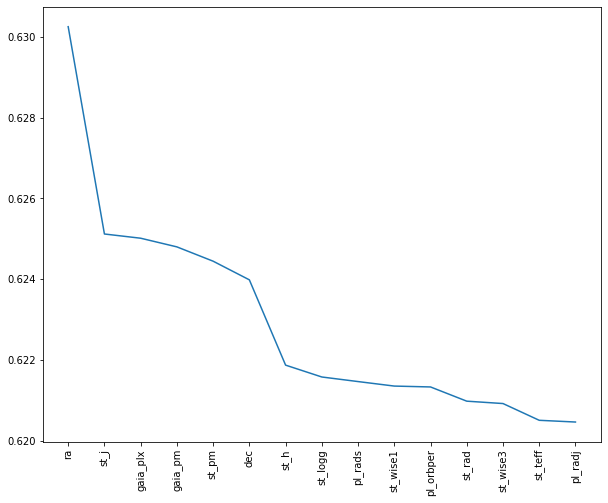

In [5]:
plt.figure(figsize=(10,8))
print(Frequency[:10])
y=[freq[x] for x in Frequency[0:15]]
fig=plt.plot(Frequency[0:15],y)
plt.xticks(rotation=90)
# plt.savefig("mostImportant.jpg")

In [6]:
for n in Frequency[:15]:
    print('# Important feature being considered:',"__"+n+"__",'\n')
    print("Trend Feature: Trend Score\n")
    num=1
    for m in trends[n]:
        print(str(num)+".",end=" ")
        print(m,":",trends[n][m])
        num+=1

# Important feature being considered: __ra__ 

Trend Feature: Trend Score

1. gaia_plx : 0.6244381788498952
2. st_j : 0.624066983328977
3. gaia_pm : 0.6239822548229476
4. st_pm : 0.6237129873406728
5. dec : 0.6229651770606066
6. pl_rads : 0.6214636178556403
7. st_h : 0.6209865130071113
8. st_rad : 0.6209783628714165
9. st_wise1 : 0.6207891160727166
10. st_logg : 0.6207789817080969
# Important feature being considered: __st_j__ 

Trend Feature: Trend Score

1. ra : 0.624066983328977
2. gaia_plx : 0.6207593107567956
3. gaia_pm : 0.6203736439350269
4. st_pm : 0.6200597766361728
5. st_jmh2 : 0.6198694651722013
6. dec : 0.6195830896823542
7. st_jmk2 : 0.6191669595824888
8. pl_orbper : 0.6181311321258534
9. st_h : 0.6180637232609615
10. st_logg : 0.6178187116917325
# Important feature being considered: __gaia_plx__ 

Trend Feature: Trend Score

1. ra : 0.6244381788498952
2. gaia_pm : 0.6207701911366931
3. st_j : 0.6207593107567956
4. st_pm : 0.6203453403820248
5. dec : 0.6197886776285098
6. 

/home/neil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/home/neil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


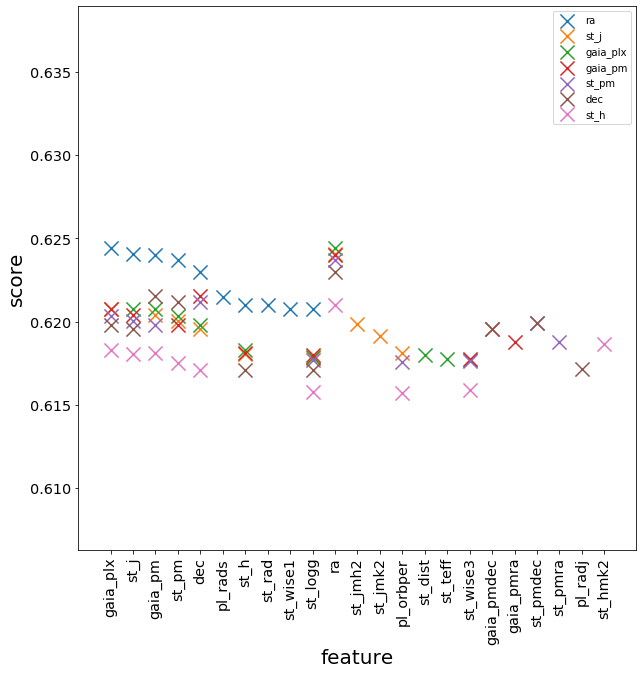

In [7]:
num=1
Fig=1
fig=plt.figure(figsize=(10,10))
# fig.set_width=10
# fig.set_height=40
# fig.add_subplot(2,5)
labels=Frequency[0:7]

for n in labels:
    c=pd.DataFrame({"feats":list(trends[n].keys())})
    c['score']=c.feats.apply(lambda x:trends[n][x])
    plt.subplot().scatter(c.feats,c.score,marker=MarkerStyle(marker="x", fillstyle=None),s=200)
#     plt.title(n,fontsize=20)
    plt.xlabel("feature",fontsize=20)
    plt.ylabel("score",fontsize=20)
    plt.xticks(rotation=90,fontsize="x-large")
    plt.yticks(fontsize="x-large")

plt.subplot().legend(labels)
plt.savefig("TOP7Features.jpg")
filterwarnings('ignore')

In [8]:
AllCombos=pd.read_csv("40Missing.csv")
AllCombos['index']=AllCombos.index
mini=pd.read_csv("scoring2.csv")
mini=pd.DataFrame(mini)
mini['index']=mini.index
q=mini.merge(AllCombos,on='index')
q['score']=q["score_x"]
q=q.drop(["score_y","score_x","index"],axis=1)
# q["score"]=q.score.apply(lambda x: x*100)
q=q.dropna()
q=q.sort_values(by="score",ascending=False)
q.head(10)

,features,score
3650,"dec,gaia_gmaglim,gaia_plxerr1,gaia_plxerr2,gai...",0.888889
12542,"pl_k2flag,pl_mnum,pl_ratrorlim,pl_trandurlim,p...",0.875000
5157,"gaia_gmaglim,gaia_pmdecerr,pl_radserr1,st_nspe...",0.872340
10740,"pl_imgflag,pl_pnum,pl_tranmidlim,st_dist,st_jm...",0.872093
3573,"dec,gaia_dist,gaia_disterr1,gaia_distlim,gaia_...",0.871429
2836,"gaia_dist,gaia_distlim,gaia_gmag,gaia_gmaglim,...",0.871429
3645,"dec,pl_radserr1,pl_tranflag,st_elat,st_logg,st...",0.870690
8671,"pl_imgflag,pl_orbsmaxlim,pl_radjerr1,pl_status...",0.863636
8717,"gaia_dist,gaia_pmerr,pl_kepflag,pl_radjlim,pl_...",0.860465
12903,"gaia_plxlim,gaia_pm,gaia_pmdecerr,pl_astflag,p...",0.860000


In [15]:
top=q[q.score>0.70]
freq={}
def addToFreq(entry,Set=q):
    global freq
    items=[x.strip() for x in entry.split(",") if ("err" not in x and "lim" not in x and x!='pl_st_nref' and x!='pl_locale')]
    for item in items:
        if item not in freq:
            freq[item]=Set.score[Set.features.str.contains(item)].sum()#/len(Set.score[Set.features.str.contains(item)])

top.features.apply(lambda x: addToFreq(x))
freq

{'dec': 4832.115449010334,
 'gaia_pmra': 3403.1492817944427,
 'pl_discmethod': 1674.879156048609,
 'pl_mnum': 1677.8785393339135,
 'pl_nnotes': 1680.0949401494395,
 'pl_pnum': 1686.9348174760032,
 'pl_rade': 3919.985103228558,
 'pl_rads': 3911.4920107834,
 'pl_rvflag': 1692.304770183649,
 'pl_status': 1615.6537577748632,
 'pl_tranmid': 3863.555796274424,
 'st_colorn': 1689.2739834645663,
 'st_glat': 1700.2811009999873,
 'st_glon': 1692.5300579538505,
 'st_h': 4564.530821781183,
 'st_jmh2': 3434.0768370539954,
 'st_logg': 3910.962149074132,
 'st_nglc': 1678.7744562512257,
 'st_nts': 1658.3785389762181,
 'st_rah': 1667.9824239197596,
 'st_teff': 3863.884146241511,
 'st_wise1': 3373.3206864940357,
 'pl_k2flag': 1677.2580789112128,
 'pl_ttvflag': 1692.6980455348694,
 'st_nrvc': 1669.081820547129,
 'st_nspec': 1666.240939863062,
 'st_wise3': 3141.232159276812,
 'pl_imgflag': 1676.9158165851186,
 'st_dist': 3885.5615818491374,
 'gaia_dist': 3866.1170274397464,
 'gaia_gmag': 2692.913035073075

In [16]:
numTop=20
numTrend=10
Frequency=sorted(freq,key=freq.get)
# print(Frequency)

Frequency.reverse()
bestOverall=Frequency[:numTop]
trendFreq={}
trends={}
# print(Frequency)
# sortedFreq={}
def ScoreAndFreq(entry,Set,currItem):
    global trendFreq
    items=[x.strip() for x in entry.split(",") if ("err" not in x and "lim" not in x and x!='pl_st_nref' and x!='pl_locale' and x!=currItem)]
    for item in items:
        if item not in trendFreq:
            trendFreq[item]=Set.score[Set.features.str.contains(item)].sum()#/len(Set.score[Set.features.str.contains(item)])

for n in bestOverall:
    selection=q[q.features.str.contains(n)]
    trendFreq={}
    selection.features.apply(lambda x:ScoreAndFreq(x,selection,n))
    trendBest=sorted(trendFreq,key=trendFreq.get)
    trendBest.reverse()
    trendBest=trendBest[:numTrend]
    out={}
    for feat in trendBest:
        out[feat]=trendFreq[feat]
    trends[n]=out
        

['ra', 'gaia_pm', 'st_j', 'st_pm', 'dec', 'st_h', 'gaia_plx', 'pl_rade', 'pl_radj', 'pl_rads']


Text(0.5, 1.0, 'Frequency')

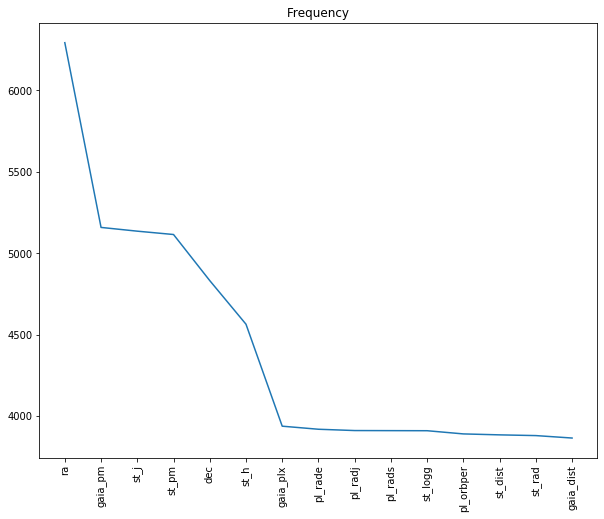

In [20]:
plt.figure(figsize=(10,8))
print(Frequency[:10])
y=[freq[x] for x in Frequency[0:15]]
fig=plt.plot(Frequency[0:15],y)
plt.xticks(rotation=90)
plt.title("Frequency")
# plt.savefig("mostImportant.jpg")

In [18]:
for n in Frequency[:15]:
    print('# Important feature being considered:',"__"+n+"__",'\n')
    print("Trend Feature: Trend Score\n")
    num=1
    for m in trends[n]:
        print(str(num)+".",end=" ")
        print(m,":",trends[n][m])
        num+=1

# Important feature being considered: __ra__ 

Trend Feature: Trend Score

1. gaia_pm : 5095.439092884189
2. st_j : 5048.701895131424
3. st_pm : 5043.343215636681
4. dec : 4748.240579555943
5. st_h : 4497.805313710507
6. pl_rade : 3919.985103228558
7. pl_radj : 3912.0124804065217
8. pl_rads : 3911.4920107834
9. gaia_plx : 3898.367550559896
10. st_rad : 3881.114767946353
# Important feature being considered: __gaia_pm__ 

Trend Feature: Trend Score

1. ra : 5095.439092884189
2. st_j : 4407.134366514431
3. st_pm : 4396.791451621434
4. dec : 4389.840949564872
5. st_h : 3997.1998811329913
6. pl_rade : 3501.254261122516
7. gaia_plx : 3493.0738655261716
8. pl_radj : 3479.573803709147
9. st_logg : 3471.8073087800885
10. gaia_dist : 3460.3458738244863
# Important feature being considered: __st_j__ 

Trend Feature: Trend Score

1. ra : 5048.701895131424
2. gaia_pm : 4407.134366514431
3. st_pm : 4352.8196319859335
4. dec : 4159.880864127326
5. st_h : 3969.823294505156
6. st_logg : 3465.345153878

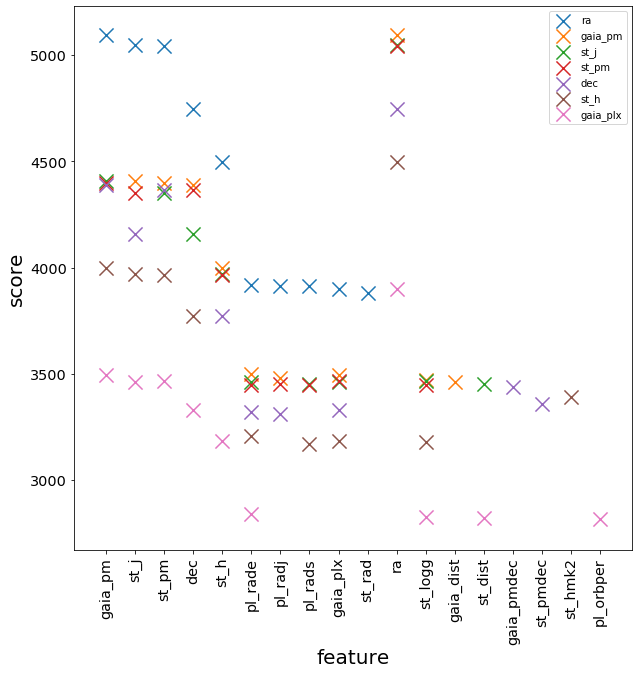

In [19]:
num=1
Fig=1
fig=plt.figure(figsize=(10,10))
# fig.set_width=10
# fig.set_height=40
# fig.add_subplot(2,5)
labels=Frequency[0:7]

for n in labels:
    c=pd.DataFrame({"feats":list(trends[n].keys())})
    c['score']=c.feats.apply(lambda x:trends[n][x])
    plt.subplot().scatter(c.feats,c.score,marker=MarkerStyle(marker="x", fillstyle=None),s=200)
#     plt.title(n,fontsize=20)
    plt.xlabel("feature",fontsize=20)
    plt.ylabel("score",fontsize=20)
    plt.xticks(rotation=90,fontsize="x-large")
    plt.yticks(fontsize="x-large")

plt.subplot().legend(labels)
plt.savefig("TOP7Features.jpg")
filterwarnings('ignore')